In [10]:
import os
import cv2
import numpy as np

# Define the directory containing the image data
data_dir = "personal_images/"

# Define the list of emotion labels
classes = ['angry', 'happy', 'neutral', 'sad']

# Initialize lists to store the images and corresponding labels
X = []
y = []

# Loop through each emotion class folder
for label, emotion in enumerate(classes):
    # Construct the path to the folder containing images for the current emotion
    emotion_dir = os.path.join(data_dir, emotion)
    
    # Loop through each image file in the emotion class folder
    for img_file in os.listdir(emotion_dir):
        # Read the image file
        img_path = os.path.join(emotion_dir, img_file)
        img = cv2.imread(img_path)
        
        # Preprocess the image (resize, normalize, etc.)
        img = cv2.resize(img, (224, 224))  # Resize the image to match your model's input size
        img = img / 255.0  # Normalize pixel values to the range [0, 1]
        
        # Append the preprocessed image and its label to the lists
        X.append(img)
        y.append(label)
    
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shapes of the input data and labels
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2661, 224, 224, 3)
y shape: (2661,)


In [11]:
import numpy as np

# Combine X and y into a single array
data = list(zip(X, y))

# Shuffle the data
np.random.shuffle(data)

# Unzip the shuffled data back into X and y
X_shuffled, y_shuffled = zip(*data)

# Convert back to numpy arrays
X = np.array(X_shuffled)
y = np.array(y_shuffled)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [13]:
model = load_model("models/my_model3.h5")

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
aug_iter = datagen.flow(X_train, y_train, batch_size=32)

In [17]:
history = model.fit(aug_iter, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15


2024-04-28 00:48:25.540451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 4/67 [>.............................] - ETA: 4:03 - loss: 1.9557 - accuracy: 0.4766

In [ ]:
# history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 47s 3s/step - loss: 3.2777 - accuracy: 0.4232
Test Accuracy: 0.42323651909828186


In [ ]:
model.save("IMGmodel_aug2.h5")

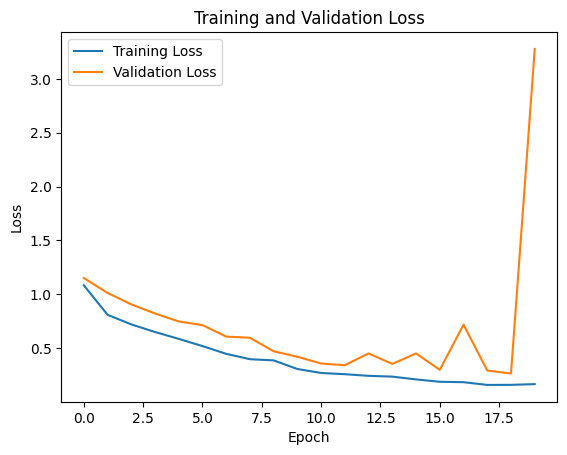

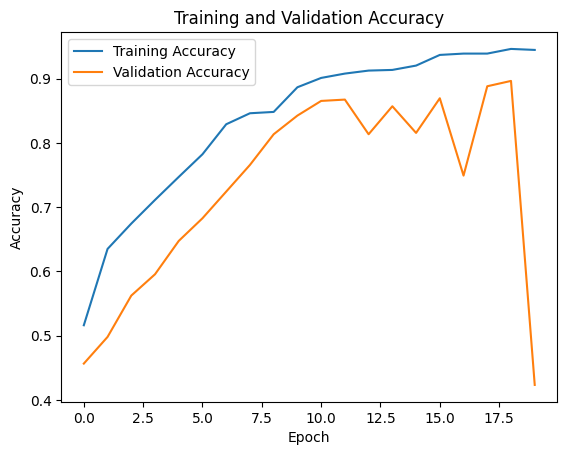

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pickle
# Save the history object to a file
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [2]:
import pickle
# Load the history object from the saved file
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

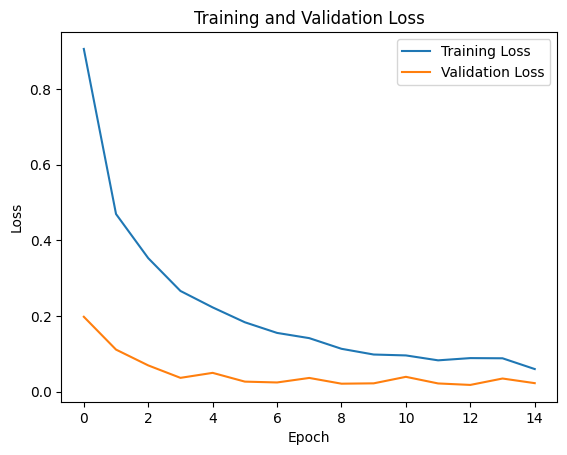

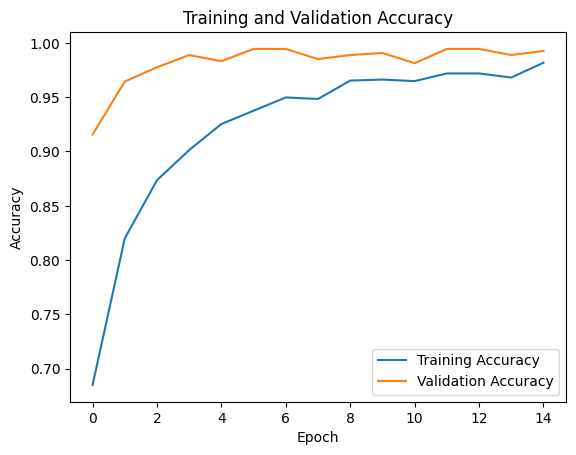

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
